In [ ]:
#Imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Main Class That have the all Functions
class LinearRegression:
    #__init__ Function 
    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    #Fit(X, y) Function
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
    #Calculate MSerror(MSE) Between y tested & predictions Function
    def mse(y_test, predictions):
      return np.mean((y_test-predictions)**2)
    #Prediction Function 
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [ ]:
#Clone Our Dataset challenge_dataset.txt form Drive
!gdown --id 1A3mhk0cR8Wr9NmM2-3svzyX1NGk_2mPB

In [ ]:
#Read Dataset
df = pd.read_csv('challenge_dataset.txt',delimiter=',',header=None)

In [ ]:
df.columns = ["X", "y"]
df.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
df.isna().sum()

X    0
y    0
dtype: int64

In [ ]:
df.describe()

,X,y
count,104.000000,104.000000
mean,8.245193,5.569970
std,3.793225,5.430152
min,5.026900,-2.680700
25%,5.709950,1.842900
50%,7.037000,4.292200
75%,9.197200,6.804400
max,22.203000,24.147000


In [ ]:
#Reshape X, y So we Doesn't have Issues with Fiting data
X = df["X"].values.reshape(-1,1)
y = df["y"].values.reshape(-1,1)

In [ ]:
#Split X, y in to train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X.shape

(104, 1)

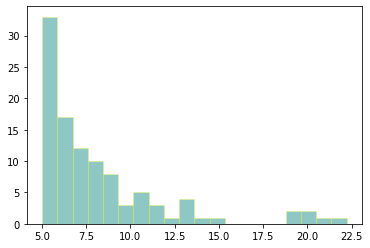

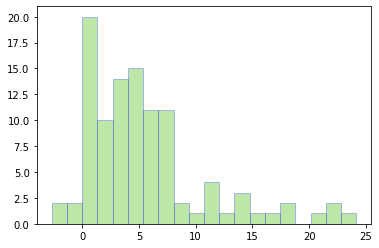

In [ ]:
#Plt In Histogram view
cmap = plt.get_cmap('viridis')
plt.hist(X, bins=20, lw=1, ec="yellow", fc=cmap(0.5), linewidth=0.5, alpha=0.5)
plt.show()
plt.hist(y, bins=20, lw=1, ec="blue", fc=cmap(0.8), linewidth=0.5, alpha=0.5)
plt.show()

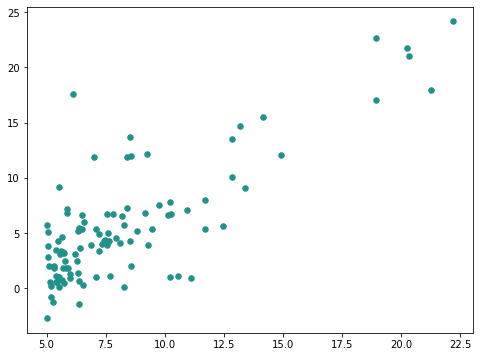

In [ ]:
#Plt In Scatter view
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y, color =cmap(0.5), marker = "o", s = 30)
plt.show()

In [ ]:
#Try to Make Fit & Get Our Predictions
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [ ]:
#Get Our MSE
mse = LinearRegression.mse(y_test, predictions)
print(mse)

6.168298439203968


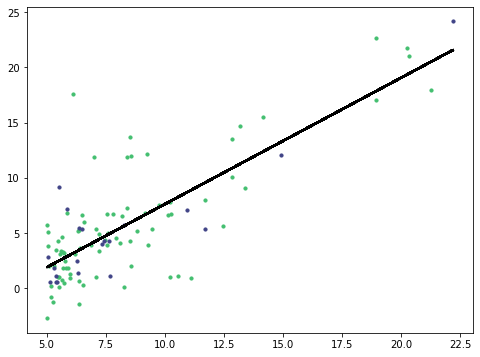

In [ ]:
#Final Outpot Our Regression Line....
y_pred_line = reg.predict(X)
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.7), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.2), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()